<a href="https://colab.research.google.com/github/gonzoreyes07/EDP-I/blob/main/Sturm-Liouville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definimos nuestras variables
x=sp.symbols('x')
lamb=sp.symbols('lambda')
X=sp.Function("X")(x)

In [ ]:
# Definimos la ecuación diferencial
ecuacion = sp.Eq(X.diff(x,2)-lamb*X,0)

In [ ]:
# Resolvemos la ecuación diferenicial
solucion = sp.dsolve(ecuacion,X)

In [ ]:
solucion

Eq(X(x), C1*exp(-sqrt(lambda)*x) + C2*exp(sqrt(lambda)*x))

In [ ]:
# Aplicamos condiciones iniciales
C1, C2 = sp.symbols('C1 C2')
X_solucion = solucion.rhs

In [ ]:
# Condición X(0)=0
eq1 = sp.Eq(X_solucion.subs(x,0),0)

In [ ]:
# Condición X(1)=0
eq2 = sp.Eq(X_solucion.subs(x,1),0)

In [ ]:
# Resolvemos el sistema para C1 y C2
sistema = sp.solve((eq1,eq2), (C1,C2))

In [ ]:
# Suponemos lambda = k^2
k = sp.Symbol("k",real=True,positive=True)
X_pos=sp.cos(k*x)*C1+sp.sin(k*x)*C2
eq1_pos=sp.Eq(X_pos.subs(x,0),0)
eq2_pos=sp.Eq(X_pos.subs(x,1),0)
solucion_pos=sp.solve((eq1_pos,eq2_pos), (C1,C2))

In [ ]:
# lambda = (n*pi)^2
n = sp.Symbol("n", integer=True, positive=True)
lambda_n = (n*sp.pi)**2
X_n = sp.sin(n*sp.pi*x)

In [ ]:
lambda_n

pi**2*n**2

In [ ]:
X_n

sin(pi*n*x)

In [ ]:
print("\nValores propios y eigenfucniones:")
print(f"lambda_n = {lambda_n}")
print(f"X_n(x) = sin(n*pi*x)")


Valores propios y eigenfucniones:
lambda_n = pi**2*n**2
X_n(x) = sin(n*pi*x)


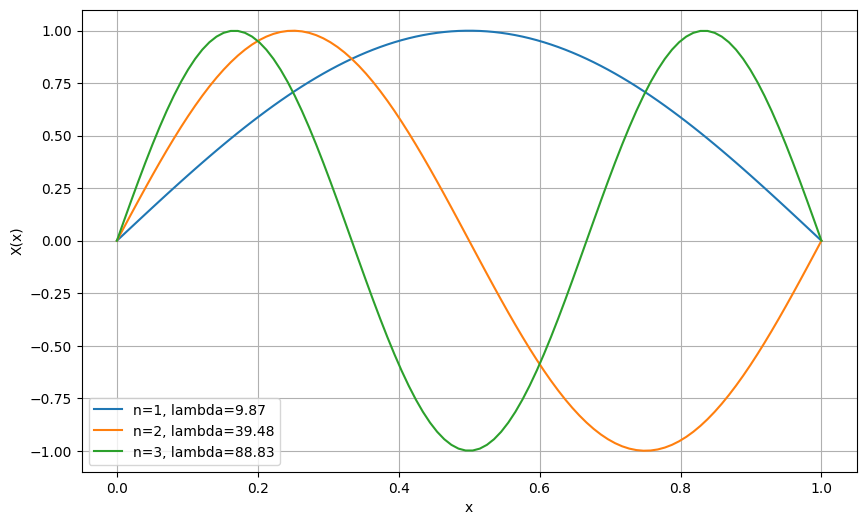

In [ ]:
# Graficamos para los primeros tres valores
x_valores=np.linspace(0,1,100)
plt.figure(figsize=(10,6))

for n_val in range(1,4):
    X_func=sp.lambdify(x, sp.sin(n_val*sp.pi*x), "numpy")
    plt.plot(x_valores, X_func(x_valores), label=f"n={n_val}, lambda={(n_val*np.pi)**2:.2f}")

plt.xlabel("x")
plt.ylabel("X(x)")
plt.legend()
plt.grid(True)
plt.show()